# Breast Caner Detection 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply

In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
x.shape

(569, 30)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

In [13]:
x_train.shapeIN


(455, 30)

In [14]:
x_test.shape

(114, 30)

In [15]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [16]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

## CNN Model

In [20]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu' ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [23]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train,epochs=epochs, validation_data=(x_test,y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 23ms/step - loss: 1.1609 - accuracy: 0.5275 - val_loss: 0.6678 - val_accuracy: 0.7368
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7285 - accuracy: 0.6747 - val_loss: 0.6333 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.7538 - val_loss: 0.6032 - val_accuracy: 0.8772
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.8044 - val_loss: 0.5710 - val_accuracy: 0.8860
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4061 - accuracy: 0.8352 - val_loss: 0.5383 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.8462 - val_loss: 0.5055 - val_accuracy: 0.8684
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.8659 - val_loss: 0.4737 - val_accuracy: 0.8684
Epoch 8/50
15/15 [=

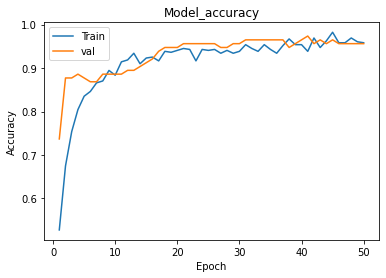

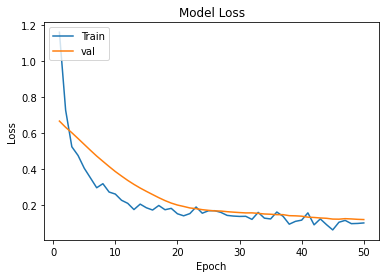

In [26]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    ply.plot(epoch_range, history.history['accuracy'])
    ply.plot(epoch_range, history.history['val_accuracy'])
    ply.title('Model_accuracy')
    ply.ylabel('Accuracy')
    ply.xlabel('Epoch')
    ply.legend(['Train','val'],loc='upper left')
    ply.show()
    
    # Plot traning & validation loss values
    ply.plot(epoch_range, history.history['loss'])
    ply.plot(epoch_range, history.history['val_loss'])
    ply.title('Model Loss')
    ply.ylabel('Loss')
    ply.xlabel('Epoch')
    ply.legend(['Train','val'],loc='upper left')
    ply.show()
plot_learningCurve(history,50)